In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from matplotlib.lines import Line2D
from matplotlib import lines

In [13]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

<h2><b>Dataset</b></h2>
<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>Diabetes_binary</td>
<td>Diabetes status</td>
<td>0 = No diabetes, 1 = Diabetes</td>
</tr>
<tr>
<td>HighBP</td>
<td>High blood pressure</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>HighChol</td>
<td>High cholesterol</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>CholCheck</td>
<td>Cholesterol check in past 5 years</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>BMI</td>
<td>Body Mass Index</td>
<td></td>
</tr>
<tr>
<td>Smoker</td>
<td>Smoked ≥100 cigarettes</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>Stroke</td>
<td>History of stroke</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>HeartDiseaseorAttack</td>
<td>History of Heart disease or heart attack</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>PhysActivity</td>
<td>Physical activity in past 30 days</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>Fruits</td>
<td>Fruit consumption frequency</td>
<td>0 = &lt;1/day, 1 = ≥1/day</td>
</tr>
<tr>
<td>Veggies</td>
<td>Vegetable consumption frequency</td>
<td>0 = &lt;1/day, 1 = ≥1/day</td>
</tr>
<tr>
<td>HvyAlcoholConsump</td>
<td>Heavy alcohol consumption (adult men >=14 drinks per week and adult women>=7 drinks per week)</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>HealthCare</td>
<td>Health insurance coverage</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>NoDocbcCost</td>
<td>Couldn't see doctor due to cost in the past 12 months</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>GenHlth</td>
<td>General health rating</td>
<td>1 = Excellent, 2 = Very Good, 3 = Good, 4 = Fair, 5 = Poor</td>
</tr>
<tr>
<td>MentHlth</td>
<td>Poor mental health days</td>
<td>Scale 1-30 days</td>
</tr>
<tr>
<td>PhysHlth</td>
<td>Physical illness/injury days</td>
<td>Scale 1-30 days</td>
</tr>
<tr>
<td>DiffWalk</td>
<td>Difficulty walking/climbing stairs</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>Sex</td>
<td>Gender</td>
<td>0 = Female, 1 = Male</td>
</tr>
<tr>
<td>Age</td>
<td>Age category</td>
<td>
1 = 18-24<br>
2 = 25-29<br>
3 = 30-34<br>
4 = 35-39<br>
5 = 40-44<br>
6 = 45-49<br>
7 = 50-54<br>
8 = 55-59<br>
9 = 60-64<br>
10 = 65-69<br>
11 = 70-74<br>
12 = 75-79<br>
13 = 80+
</td>
</tr>
<tr>
<td>Education</td>
<td>Education level</td>
<td>
1 = Never attended school/kindergarten<br>
2 = Elementary (Grades 1-8)<br>
3 = Some high school (Grades 9-11)<br>
4 = High school graduate/GED<br>
5 = Some college/technical school (1-3 years)<br>
6 = College graduate (4+ years)
</td>
</tr>
<tr>
<td>Income</td>
<td>Annual income</td>
<td>
1 = &lt;$10,000<br>
2 = $10k-&lt;$15k<br>
3 = $15k-&lt;$20k<br>
4 = $20k-&lt;$25k<br>
5 = $25k-&lt;$35k<br>
6 = $35k-&lt;$50k<br>
7 = $50k-&lt;$75k<br>
8 = ≥$75k
</td>
</tr>
</tbody>
</table>

In [14]:
df.drop_duplicates(inplace=True)
df = df.astype(int)

In [15]:
df.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
189380,1,1,1,1,40,1,0,1,1,1,...,1,0,3,0,10,1,0,10,5,7
91385,0,0,0,1,28,1,0,0,1,1,...,1,0,2,0,0,0,0,4,5,7
239472,0,1,0,1,33,0,0,0,1,1,...,1,1,3,2,0,0,0,6,6,6
114538,1,1,1,1,29,0,0,0,0,1,...,1,0,5,10,30,1,0,11,3,2
177457,0,0,0,1,24,0,0,0,1,1,...,1,0,2,0,30,0,0,8,6,8


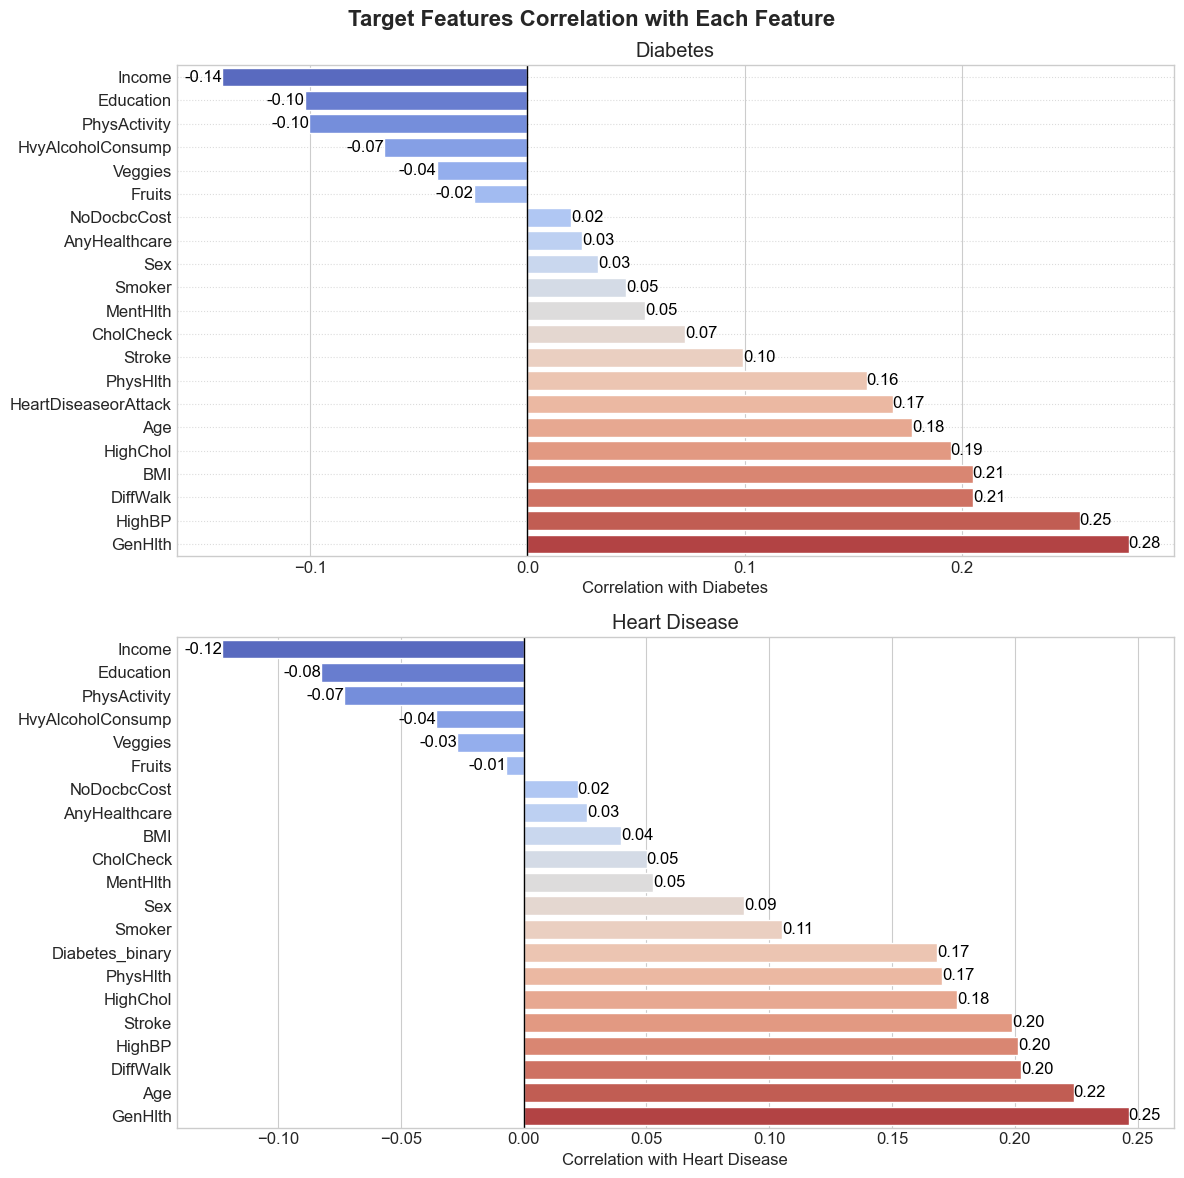

In [16]:
# Set up vertical plot grid
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
plt.subplots_adjust(hspace=0.6)
sns.set_style("whitegrid")

# 1. Diabetes_binary Correlation --------------------------------------------------
# Compute correlation with Diabetes_binary
corr_values = df.corr()['Diabetes_binary'].drop('Diabetes_binary')

# Sort correlations
corr_values_sorted = corr_values.sort_values()

# Plot horizontal bar chart
sns.barplot(x=corr_values_sorted.values, y=corr_values_sorted.index, hue=corr_values_sorted.index, 
                 palette='coolwarm', orient='h', legend=False, ax=ax[0])

# Add correlation values on bars
for i, v in enumerate(corr_values_sorted):
    ax[0].text(v, i, f"{v:.2f}", color='black', va='center', ha='left' if v > 0 else 'right')

ax[0].axvline(0, color='black', linewidth=1)  # Vertical line at 0
ax[0].set_xlabel('Correlation with Diabetes')
ax[0].set_title('Diabetes')
ax[0].set_ylabel('')
ax[0].grid(axis='y', linestyle=':', alpha=0.7)

# 2. HeartDiseaseorAttack Correlation --------------------------------------------------
# Compute correlation with HeartDiseaseorAttack
corr_values = df.corr()['HeartDiseaseorAttack'].drop('HeartDiseaseorAttack')

# Sort correlations
corr_values_sorted = corr_values.sort_values()

sns.barplot(x=corr_values_sorted.values, y=corr_values_sorted.index, hue=corr_values_sorted.index, 
                 palette='coolwarm', orient='h', legend=False, ax=ax[1])

# Add correlation values on bars
for i, v in enumerate(corr_values_sorted):
    ax[1].text(v, i, f"{v:.2f}", color='black', va='center', ha='left' if v > 0 else 'right')

ax[1].axvline(0, color='black', linewidth=1)  # Vertical line at 0
ax[1].set_xlabel('Correlation with Heart Disease')
ax[1].set_ylabel('')
ax[1].set_title('Heart Disease', loc='center')

# Add global elements
plt.suptitle("Target Features Correlation with Each Feature", 
            y=0.98, fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

## Target Features Correlation with Each Feature

**Description:**  
These bar charts display the correlation of various features with diabetes and heart disease. Positive and negative correlations are shown, indicating the strength and direction of the relationship between each feature and the target conditions.

**Key Insights:**  
- **Diabetes:** 
  - **Positive Correlations:** General health (0.28), high blood pressure (0.25), and BMI (0.21) show the strongest positive correlations with diabetes.
  - **Negative Correlations:** Income (-0.14) and education (-0.10) are negatively correlated, suggesting higher socioeconomic status is associated with lower diabetes prevalence.

- **Heart Disease:** 
  - **Positive Correlations:** General health (0.25), age (0.22), and high blood pressure (0.20) are strongly positively correlated with heart disease.
  - **Negative Correlations:** Income (-0.12) and education (-0.08) also show negative correlations, indicating similar socioeconomic influences as seen with diabetes.

**Implications:**  
These correlations highlight key risk factors for diabetes and heart disease, emphasizing the role of socioeconomic status, general health, and lifestyle factors. Interventions targeting these areas could be effective in reducing the prevalence of these conditions.

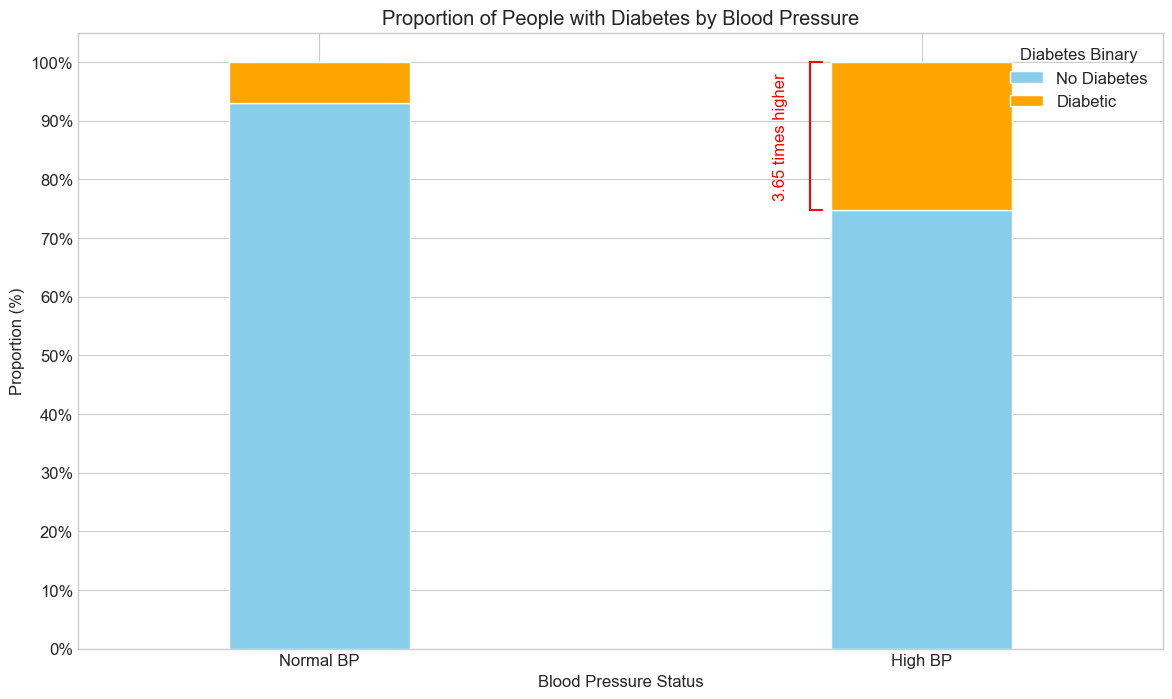

In [17]:
# Group by HighBP and calculate the proportions for Diabetes_binary
grouped_data = df.groupby('HighBP')['Diabetes_binary'].value_counts(normalize=True).unstack()

# Calculate the ratio of Diabetes proportion between HighBP = 1 and HighBP = 0
ratio = grouped_data.loc[1, 1] / grouped_data.loc[0, 1]
ratio_text = f'{ratio:.2f} times higher'

# Plot the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(14,8), width=0.3)

# Change the y-ticks to range from 0 to 100 (as percentages)
ax.set_yticks([i / 100 for i in range(0, 101, 10)])  # Tick marks from 0 to 1, in increments of 0.1 (10%)
ax.set_yticklabels([f'{i}%' for i in range(0, 101, 10)])  # Labels as percentages

# Change x labels to "Normal BP" and "High BP"
ax.set_xticklabels(['Normal BP', 'High BP'])

# Make x labels horizontal
plt.xticks(rotation=0)  # Set x labels to horizontal

# Set the labels and title
plt.xlabel('Blood Pressure Status')
plt.ylabel('Proportion (%)')
plt.title('Proportion of People with Diabetes by Blood Pressure')

# Add the legend
plt.legend(title='Diabetes Binary', loc='upper right', labels=['No Diabetes','Diabetic'])

# Add the mirrored square brace to the left of the second bar
y_start = grouped_data.loc[1, 0]  # Starting y-coordinate
y_end = 1  # Ending y-coordinate

# Add the mirrored square brace to the left of the second bar
x = ax.patches[1].get_x() - 0.035  # Adjust position to the left of the second bar
plt.plot([x, x], [y_start, y_end], color='red')  # Vertical line
plt.plot([x, x+0.02], [y_start, y_start], color='red')  # Bottom horizontal line
plt.plot([x, x+0.02], [y_end, y_end], color='red')  # Top horizontal line

# Add the sideways text next to the mirrored brace
plt.text(x-0.05, (y_start + y_end) / 2, ratio_text, rotation=90, ha='center', va='center', fontsize=12, color='red')

# Show the plot
plt.show()

## Proportion of People with Diabetes by Blood Pressure

**Description:**  
This bar chart illustrates the proportion of individuals with and without diabetes across two blood pressure categories: normal and high. It highlights the increased prevalence of diabetes among those with high blood pressure.

**Key Insights:**  
- Individuals with high blood pressure are 3.65 times more likely to have diabetes compared to those with normal blood pressure.
- The proportion of diabetics is significantly higher in the high blood pressure group, indicating a strong association between these two health conditions.

**Implications:**  
These findings suggest that high blood pressure is a significant risk factor for diabetes. This underscores the importance of monitoring and managing blood pressure to potentially reduce the risk of developing diabetes.

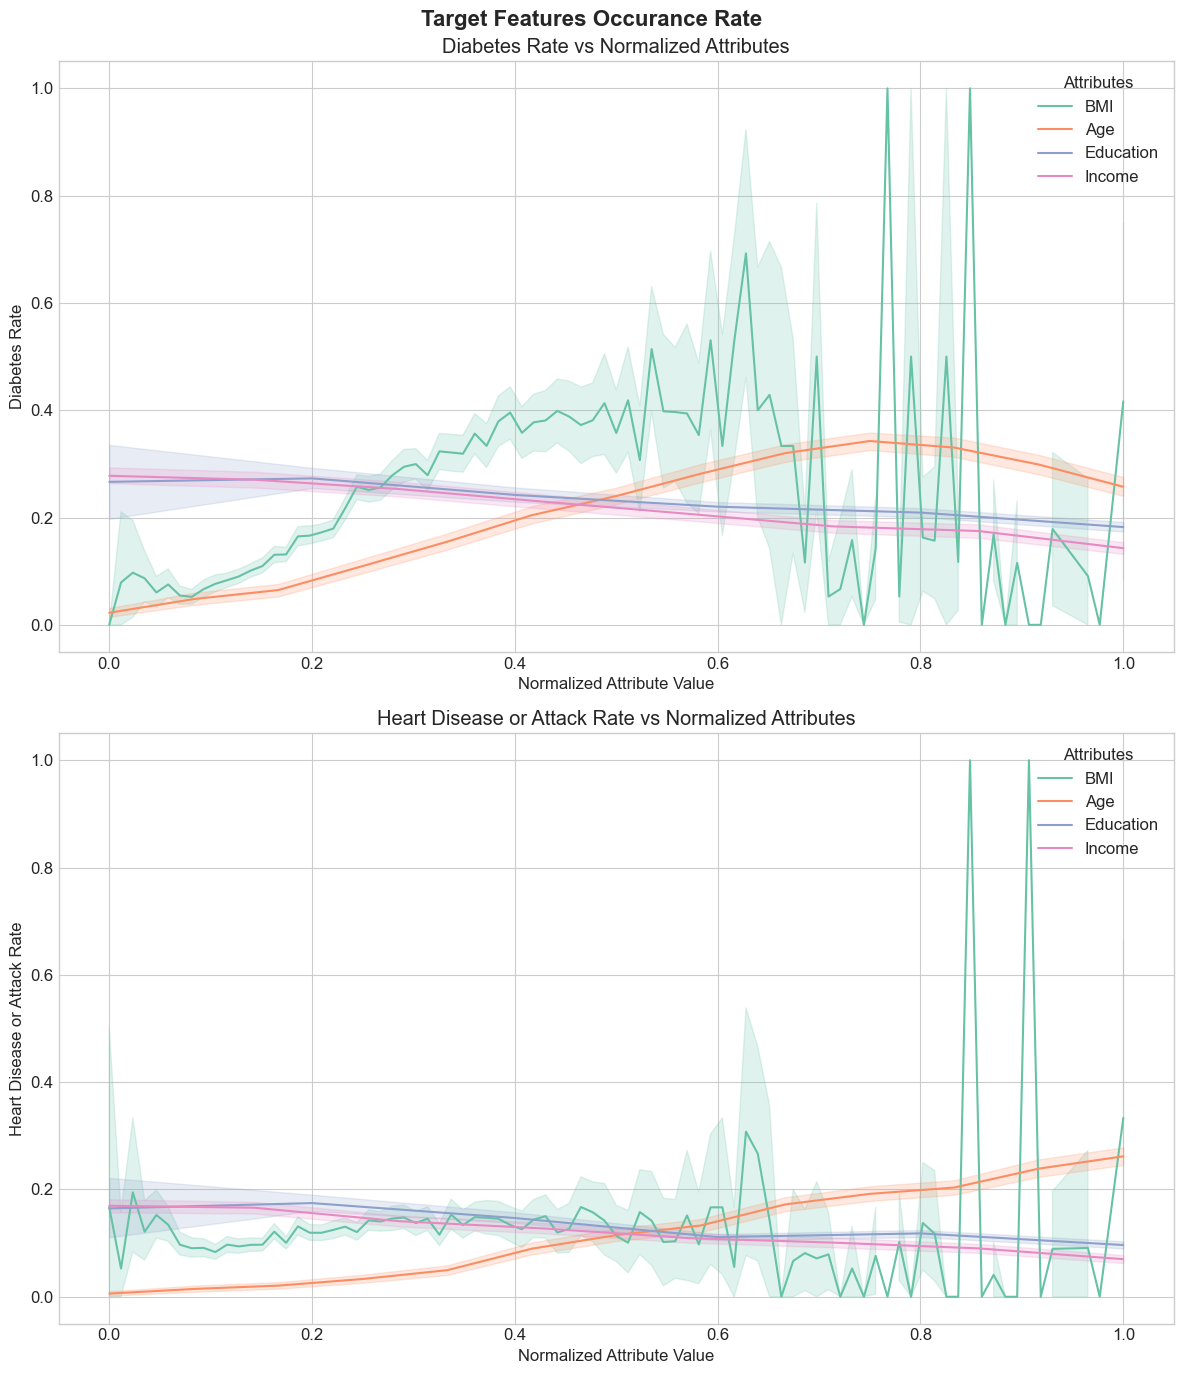

In [18]:
# Set up vertical plot grid
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.subplots_adjust(hspace=0.6)
sns.set_style("whitegrid")

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the continuous columns (BMI, Age, Education, Income)
attributes = ['BMI', 'Age', 'Education', 'Income']

df_line=df.copy()

# Normalize the selected columns
df_line[attributes] = scaler.fit_transform(df[attributes])

# 1. Diabetes Rate --------------------------------------------------
# Group the data by the normalized attributes and calculate the mean diabetes rate
diabetes_rate = df_line.groupby(attributes)['Diabetes_binary'].mean().reset_index()

# Plot each attribute's line with a different color
for i, attr in enumerate(attributes):
    sns.lineplot(data=diabetes_rate, x=attr, y='Diabetes_binary', label=attr, color=sns.color_palette("Set2")[i], ax=ax[0])

# Set the labels and title
ax[0].set_xlabel('Normalized Attribute Value')
ax[0].set_ylabel('Diabetes Rate')
ax[0].set_title('Diabetes Rate vs Normalized Attributes')

# Show the legend
ax[0].legend(title='Attributes')

# 2. Heart Disease Rate --------------------------------------------------
# Group the data by the normalized attributes and calculate the mean diabetes rate
heart_rate = df_line.groupby(attributes)['HeartDiseaseorAttack'].mean().reset_index()

# Plot each attribute's line with a different color
for i, attr in enumerate(attributes):
    sns.lineplot(data=heart_rate, x=attr, y='HeartDiseaseorAttack', label=attr, color=sns.color_palette("Set2")[i], ax=ax[1])

# Set the labels and title
ax[1].set_xlabel('Normalized Attribute Value')
ax[1].set_ylabel('Heart Disease or Attack Rate')
ax[1].set_title('Heart Disease or Attack Rate vs Normalized Attributes')

# Show the legend
ax[1].legend(title='Attributes', loc='upper right')

# Add global elements
plt.suptitle("Target Features Occurance Rate", 
            y=0.98, fontsize=16, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

## Target Features Occurrence Rate

**Description:**  
These line charts show the occurrence rates of diabetes and heart disease in relation to normalized values of key attributes: BMI, age, education, and income. The shaded areas represent variability in the data.

**Key Insights:**  
- **Diabetes Rate:**
  - **BMI:** A strong positive correlation is observed, with higher BMI values associated with increased diabetes rates.
  - **Age:** Shows a moderate positive trend, indicating higher diabetes rates with increasing age.
  - **Education and Income:** Both show a slight negative trend, suggesting lower diabetes rates with higher education and income levels.

- **Heart Disease Rate:**
  - **BMI and Age:** Both attributes show a positive correlation with heart disease rates, similar to their relationship with diabetes.
  - **Education and Income:** These attributes have a minimal negative impact on heart disease rates, indicating socioeconomic factors may play a role in risk reduction.

**Implications:**  
The analysis highlights BMI and age as significant risk factors for both diabetes and heart disease. Socioeconomic factors like education and income appear to mitigate these risks, emphasizing the need for targeted health interventions and policies.

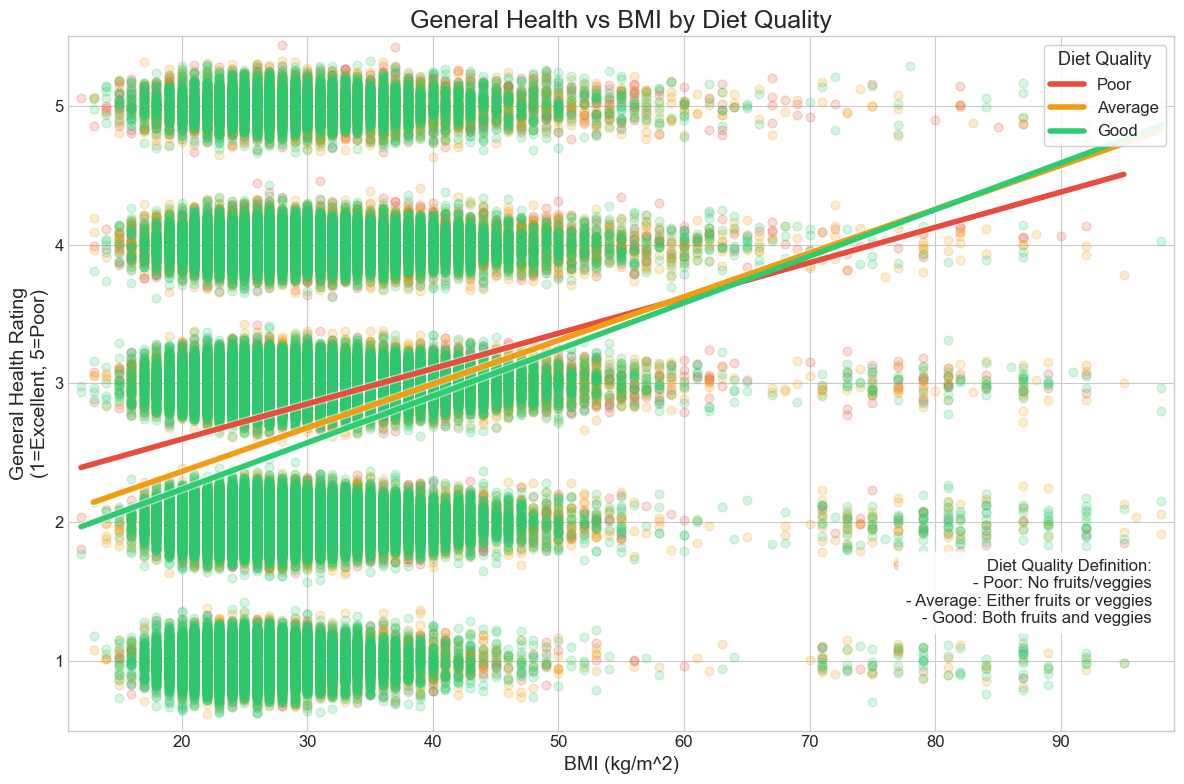

In [19]:
# Set style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Create categorical variable for diet quality
df['FruitVegScore'] = df['Fruits'] + df['Veggies']
df['Diet'] = df['FruitVegScore'].map({0: 'Poor', 1: 'Average', 2: 'Good'})

# Create color scheme
diet_colors = {'Poor': '#e74c3c', 'Average': '#f39c12', 'Good': '#2ecc71'}

# Create the figure
plt.figure(figsize=(12, 8))

# Plot individual data points with jittering
for diet in ['Poor', 'Average', 'Good']:
    subset = df[df['Diet'] == diet]
    if not subset.empty:
        jitter = np.random.normal(0, 0.1, size=len(subset))
        plt.scatter(subset['BMI'], subset['GenHlth'] + jitter,
                    color=diet_colors[diet], alpha=0.2,  # Reduced alpha for better line visibility
                    label=None, zorder=1, s=40)  # Added smaller marker size

# Enhanced trend lines
for diet in ['Poor', 'Average', 'Good']:
    subset = df[df['Diet'] == diet]
    if len(subset) > 1:
        z = np.polyfit(subset['BMI'], subset['GenHlth'], 1)
        p = np.poly1d(z)
        x_range = np.linspace(subset['BMI'].min(), subset['BMI'].max(), 100)
        
        # Plot white background line for contrast
        plt.plot(x_range, p(x_range), color='white',
                 linestyle='-', linewidth=6, alpha=0.5, zorder=2)
        
        # Main colored line
        plt.plot(x_range, p(x_range), color=diet_colors[diet],
                 linestyle='-', linewidth=4, label=diet, zorder=3)

# Enhanced legend elements
legend_elements = [
    Line2D([0], [0], color=diet_colors['Poor'], lw=4, linestyle='-', label='Poor'),
    Line2D([0], [0], color=diet_colors['Average'], lw=4, linestyle='-', label='Average'),
    Line2D([0], [0], color=diet_colors['Good'], lw=4, linestyle='-', label='Good')
]

plt.legend(handles=legend_elements, title='Diet Quality',
          title_fontsize=13, fontsize=12, loc='upper right',
          frameon=True, framealpha=0.9)

# Axis configuration
plt.yticks([1, 2, 3, 4, 5], labels=['1', '2', '3', '4', '5'])
plt.ylim(0.5, 5.5)
plt.xlim(df['BMI'].min()-1, df['BMI'].max()+1)
plt.title('General Health vs BMI by Diet Quality', fontsize=18)
plt.xlabel('BMI (kg/m^2)', fontsize=14)
plt.ylabel('General Health Rating\n(1=Excellent, 5=Poor)', fontsize=14)

# Add explanatory annotation with improved positioning
plt.annotate("Diet Quality Definition:\n- Poor: No fruits/veggies\n- Average: Either fruits or veggies\n- Good: Both fruits and veggies",
             xy=(0.98, 0.15), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.4", facecolor='white', alpha=0.9),
             fontsize=12, ha='right', va='bottom')

plt.tight_layout()
plt.show()

## General Health vs BMI by Diet Quality

**Description:**  
This scatter plot visualizes the relationship between Body Mass Index (BMI) and general health ratings, segmented by diet quality. The diet quality is categorized into three groups: Poor (no fruits/veggies), Average (either fruits or veggies), and Good (both fruits and veggies).

**Key Insights:**  
- **Insight 1:** There is a noticeable trend where higher BMI is associated with poorer general health ratings across all diet quality categories.
- **Insight 2:** Individuals with a "Good" diet quality tend to have better general health ratings at similar BMI levels compared to those with "Poor" or "Average" diet quality.
- **Insight 3:** The slope of the trend lines suggests that diet quality may mitigate some negative health impacts associated with higher BMI.

**Implications:**  
These insights highlight the importance of diet quality in maintaining better general health, even for individuals with higher BMI. Encouraging a balanced diet rich in fruits and vegetables could be a key strategy in improving overall health outcomes.

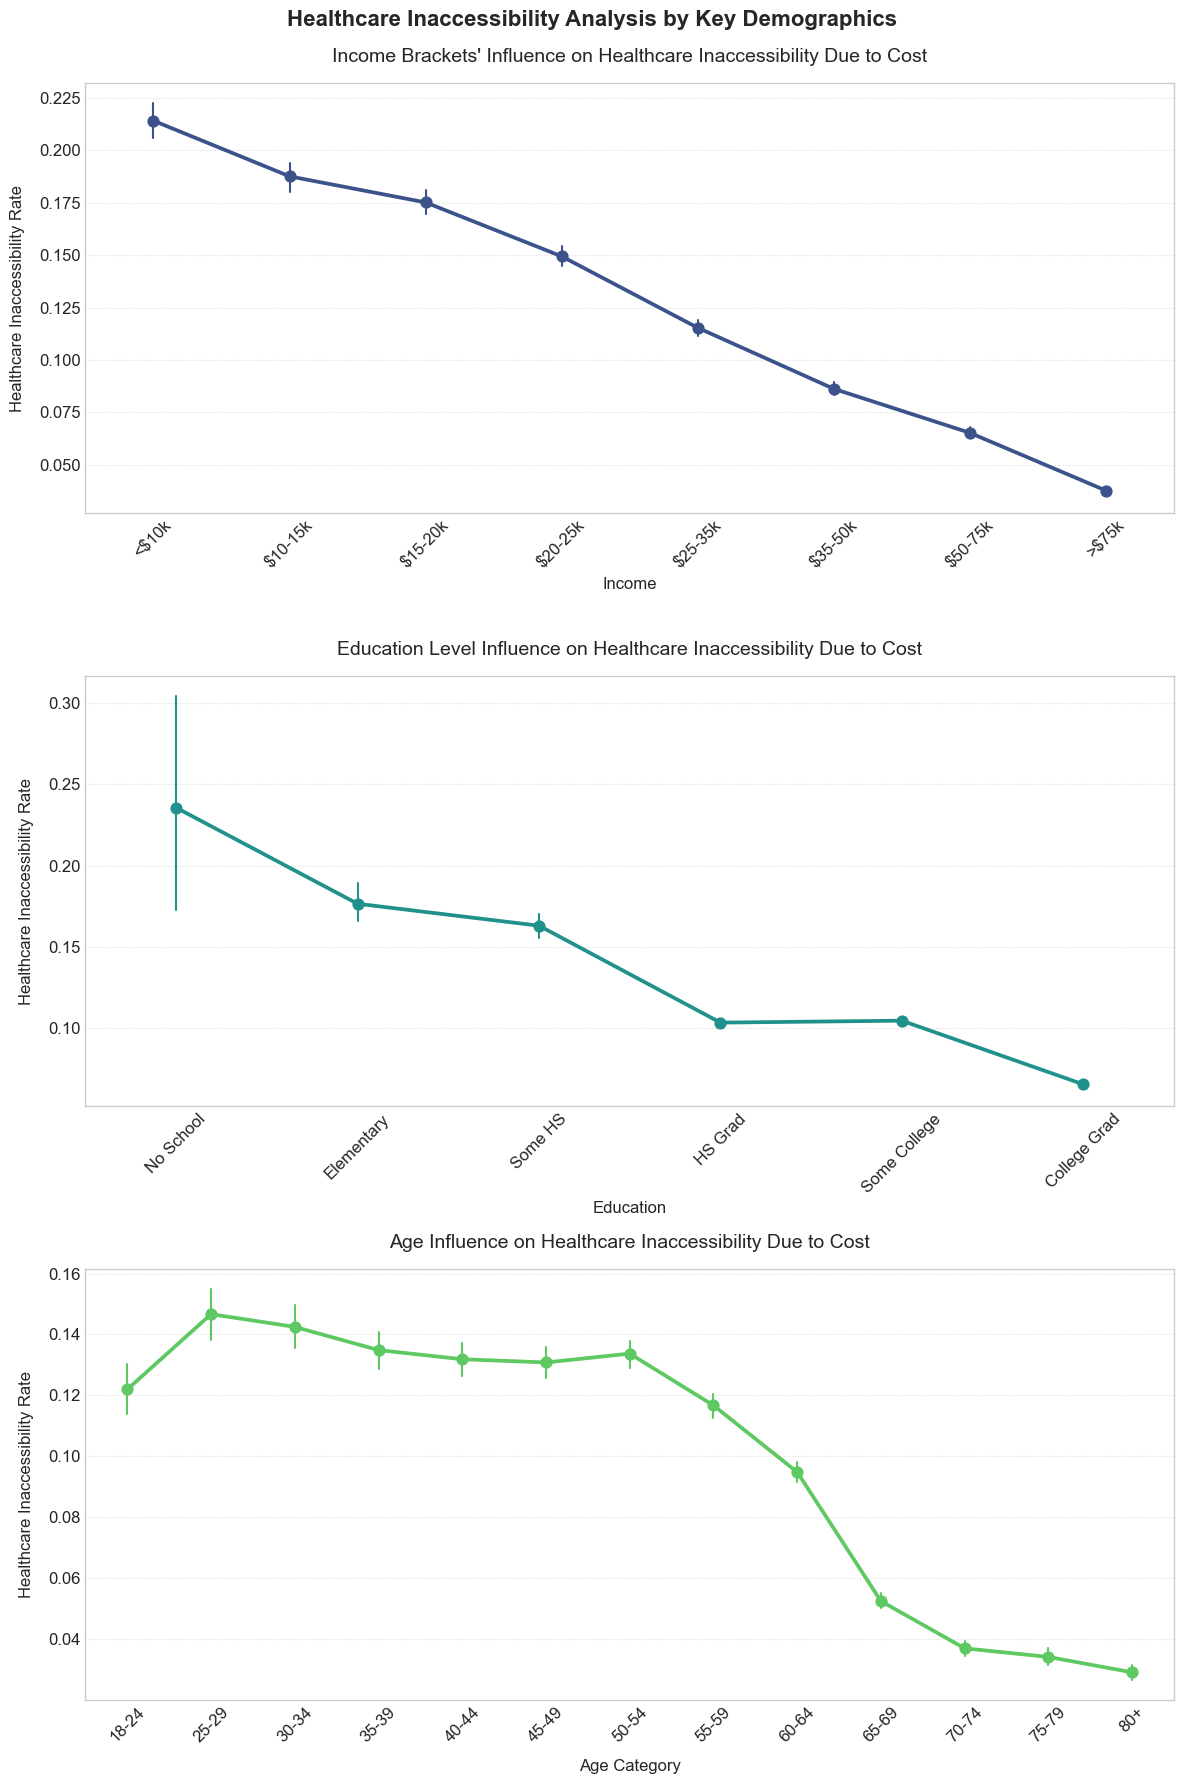

In [20]:
# Set up vertical plot grid
fig, ax = plt.subplots(3, 1, figsize=(12, 18))
plt.subplots_adjust(hspace=0.6)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# Custom palette
palette = sns.color_palette("viridis", n_colors=3)

# 1. Income Analysis --------------------------------------------------
income_labels = [
    '<$10k', '$10-15k', '$15-20k', '$20-25k', 
    '$25-35k', '$35-50k', '$50-75k', '>$75k'
]
sns.pointplot(data=df, x='Income', y='NoDocbcCost', 
             order=sorted(df.Income.unique()),
             ax=ax[0], color=palette[0],
             err_kws={'linewidth': 1.5}, errorbar=('ci', 95))

ax[0].set_xticks(range(len(income_labels)))  # Explicit tick positions
ax[0].set_xticklabels(income_labels, rotation=45)
ax[0].set_title("Income Brackets' Influence on Healthcare Inaccessibility Due to Cost", pad=15, fontsize=14)
ax[0].set_ylabel("Healthcare Inaccessibility Rate", labelpad=10)
ax[0].grid(axis='y', linestyle=':', alpha=0.7)

# 2. Education Analysis -----------------------------------------------
edu_labels = [
    'No School', 'Elementary', 'Some HS',
    'HS Grad', 'Some College', 'College Grad'
]
sns.pointplot(data=df, x='Education', y='NoDocbcCost', 
           order=sorted(df.Education.unique()), ax=ax[1], color=palette[1],
           err_kws={'linewidth': 1.5})

ax[1].set_xticks(range(len(edu_labels)))  # Explicit tick positions
ax[1].set_xticklabels(edu_labels, rotation=45)
ax[1].set_title("Education Level Influence on Healthcare Inaccessibility Due to Cost", pad=15, fontsize=14)
ax[1].set_ylabel("Healthcare Inaccessibility Rate", labelpad=10)
ax[1].grid(axis='y', linestyle=':', alpha=0.7)

# 3. Age Analysis -----------------------------------------------------
age_labels = [
    '18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
    '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'
]
sns.pointplot(data=df, x='Age', y='NoDocbcCost',
            order=sorted(df.Age.unique()), ax=ax[2],
            color=palette[2], err_kws={'linewidth': 1.5})

ax[2].set_xticks(range(len(age_labels)))  # Explicit tick positions for all age categories
ax[2].set_xticklabels(age_labels, rotation=45)
ax[2].set_title("Age Influence on Healthcare Inaccessibility Due to Cost", pad=15, fontsize=14)
ax[2].set_xlabel("Age Category", labelpad=10)
ax[2].set_ylabel("Healthcare Inaccessibility Rate", labelpad=10)
ax[2].grid(axis='y', linestyle=':', alpha=0.7)

# Add global elements
plt.suptitle("Healthcare Inaccessibility Analysis by Key Demographics", 
            y=0.99, fontsize=16, weight='bold')

plt.tight_layout()
plt.show()

## Healthcare Inaccessibility Analysis by Key Demographics

**Description:**  
These line charts illustrate the influence of income, education level, and age on healthcare inaccessibility due to cost. Each chart shows the rate of individuals unable to access healthcare across different demographic categories.

**Key Insights:**  
- **Income:** There is a clear inverse relationship between income and healthcare inaccessibility. As income increases, the rate of inaccessibility decreases significantly.
- **Education:** Higher education levels are associated with lower rates of healthcare inaccessibility. Individuals with no schooling experience the highest inaccessibility rates, while college graduates have the lowest.
- **Age:** Younger age groups, particularly those aged 18-29, face higher healthcare inaccessibility rates. The rate decreases steadily with age, with the lowest rates observed in the oldest age groups.

**Implications:**  
These insights suggest that socioeconomic factors such as income and education play a crucial role in healthcare access. Addressing these disparities could improve healthcare accessibility, particularly for lower-income and less-educated populations. Additionally, targeted interventions may be needed for younger age groups to reduce barriers to healthcare access.

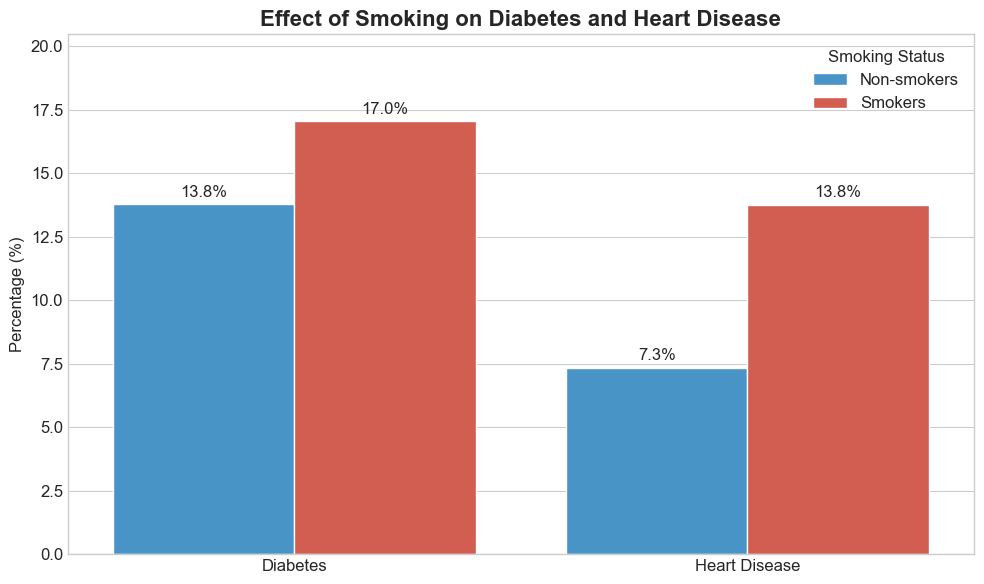

In [21]:
# Manually calculate percentages for diabetes by smoking status
diabetes_non_smoker = df[df['Smoker'] == 0]['Diabetes_binary'].mean() * 100
diabetes_smoker = df[df['Smoker'] == 1]['Diabetes_binary'].mean() * 100

# Manually calculate percentages for heart disease by smoking status
heart_non_smoker = df[df['Smoker'] == 0]['HeartDiseaseorAttack'].mean() * 100
heart_smoker = df[df['Smoker'] == 1]['HeartDiseaseorAttack'].mean() * 100

# Create the visualization data
data = {
    'Condition': ['Diabetes', 'Diabetes', 'Heart Disease', 'Heart Disease'],
    'Smoking Status': ['Non-smokers', 'Smokers', 'Non-smokers', 'Smokers'],
    'Percentage': [
        diabetes_non_smoker,
        diabetes_smoker,
        heart_non_smoker,
        heart_smoker
    ]
}

plot_df = pd.DataFrame(data)

# Create the visualization
plt.figure(figsize=(10, 6))

# Set the style
sns.set_style("whitegrid")
ax = sns.barplot(x='Condition', y='Percentage', hue='Smoking Status', data=plot_df, palette=['#3498db', '#e74c3c'])

plt.title('Effect of Smoking on Diabetes and Heart Disease', fontsize=16, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('')
plt.ylim(0, max(data['Percentage']) * 1.2)  # Add some space above the bars

bars = ax.containers  # This gets the bar containers
for container in bars:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.legend(title='Smoking Status')
plt.tight_layout()
plt.show()

## Effect of Smoking on Diabetes and Heart Disease

**Description:**  
This bar chart compares the prevalence of diabetes and heart disease between smokers and non-smokers. It highlights the percentage of individuals affected by these conditions within each group.

**Key Insights:**  
- **Diabetes:** Smokers have a higher prevalence of diabetes (17.0%) compared to non-smokers (13.8%).
- **Heart Disease:** The prevalence of heart disease is also higher among smokers (13.8%) compared to non-smokers (7.3%).

**Implications:**  
These insights suggest a strong association between smoking and increased risk of both diabetes and heart disease. This underscores the importance of smoking cessation programs as a strategy to reduce the incidence of these chronic conditions.
